#**ML Home Loan** 

# Test Data Set Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the training dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MLProject/test_data.csv")

In [ ]:
pd.set_option('display.max_columns',122)

In [ ]:
df

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,367294,Cash loans,F,N,Y,0,180000.0,265306.5,25317.0,252000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.032561,-21413,-5323,-3666.0,-4551,NaN,1,1,0,1,1,0,NaN,2.0,1,1,TUESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.708546,NaN,0.2397,0.1319,0.9901,0.8572,0.1315,0.28,0.1293,0.5208,0.5417,0.0768,0.3165,0.1783,0.0039,0.0072,0.0504,0.0623,0.9831,0.7779,0.0299,0.0806,0.0345,0.3333,0.3750,0.0243,0.2461,0.0280,0.0,0.0015,0.2056,0.1230,0.9901,0.8591,0.1324,0.28,0.1207,0.5417,0.5417,0.0383,0.3219,0.1299,0.0039,0.0047,reg oper account,block of flats,0.2362,Panel,No,1.0,0.0,1.0,0.0,-1547.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,2.0,5.0
1,439847,Cash loans,F,N,Y,0,202500.0,346500.0,21069.0,346500.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.026392,-20087,-1406,-7258.0,-3639,NaN,1,1,0,1,0,0,Sales staff,1.0,2,2,THURSDAY,13,0,0,0,0,0,0,Trade: type 7,NaN,0.649626,0.513694,0.1959,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1153,NaN,0.1748,NaN,0.0010,0.1996,0.1803,0.9871,NaN,NaN,0.0000,0.4483,0.1667,NaN,0.1180,NaN,0.1821,NaN,0.0010,0.1978,0.1737,0.9871,NaN,NaN,0.00,0.4483,0.1667,NaN,0.1173,NaN,0.1779,NaN,0.0010,NaN,block of flats,0.1375,Panel,No,0.0,0.0,0.0,0.0,-415.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
2,380562,Cash loans,M,Y,N,0,360000.0,545040.0,36553.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13008,-1874,-4975.0,-5324,18.0,1,1,0,1,0,0,Managers,2.0,2,2,TUESDAY,4,0,0,0,0,0,0,Business Entity Type 3,0.266554,0.645383,0.740799,0.0825,0.0671,0.9757,0.6668,0.0290,0.00,0.1379,0.1667,0.2083,0.1238,0.0672,0.0704,0.0000,0.0000,0.0840,0.0696,0.9757,0.6798,0.0293,0.0000,0.1379,0.1667,0.2083,0.1267,0.0735,0.0

### Checking various parameters of all the Columns

In [ ]:
df.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,123005.000000,123005.000000,1.230050e+05,1.230050e+05,122999.000000,1.228940e+05,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,41709.000000,123005.0,123005.00000,123005.000000,123005.000000,123005.000000,123005.000000,123004.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,53701.000000,1.227580e+05,98696.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.000000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.000000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,60519.000000,51037.000000,62898.000000,41274.000000,37111.000000,57434.00000,60984.000000,61711.000000,39607.000000,49958.000000,39018.000000,61189.000000,37637.000000,55111.000000,63522.000000,122623.000000,122623.000000,122623.000000,122623.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.000000,123005.00000,123005.000000,123005.000000,123005.000000,106484.000000,106484.000000,106484.000000,106484.000000,106484.000000,106484.000000
mean,278403.806894,0.417934,1.684971e+05,5.986369e+05,27099.750994,5.379516e+05,0.020868,-16037.410203,63779.740141,-4987.958213,-2994.335011,12.079144,1.0,0.81995,0.199748,0.998268,0.280249,0.056843,2.152605,2.053478,2.031804,12.064103,0.015097,0.049974,0.039885,0.077265,0.230649,0.180001,0.501473,5.140578e-01,0.510791,0.117813,0.088651,0.977645,0.752884,0.044801,0.079517,0.149946,0.226754,0.231993,0.066131,0.101590,0.107779,0.008687,0.028497,0.114746,0.087819,0.977039,0.760079,0.042791,0.075139,0.145503,0.222940,0.228417,0.064709,0.106626,0.106448,0.008050,0.027256,0.118274,0.088189,0.977634,0.756132,0.044799,0.07866,0.149436,0.226428,0.231784,0.066963,0.102795

#### Column no 42-86 are Normalised

### Checking for any Duplicated Rows in the Dataset

In [ ]:
X = df.drop(['SK_ID_CURR'], axis=1)

In [ ]:
df.shape

(123005, 121)

In [ ]:
X.duplicated().sum()

0

In [ ]:
df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [ ]:
df.shape[1]

121

In [ ]:
df.shape[0]

123005

### Analysing various Data types present in the Dataset

In [ ]:
df.dtypes.value_counts()

float64    65
int64      40
object     16
dtype: int64

In [ ]:
pd.set_option('display.max_rows',122)

### Checking for NULL Values in each Column

In [ ]:
df.isnull().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         6
AMT_GOODS_PRICE                   111
NAME_TYPE_SUITE                   522
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     81296
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

:### Dropping those columns which have more than 60 % NULL Values

In [ ]:
df = df.drop(['YEARS_BUILD_AVG','COMMONAREA_AVG','FLOORSMIN_AVG','LIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_AVG',
             'YEARS_BUILD_MODE','COMMONAREA_MODE','FLOORSMIN_MODE','LIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MODE',
              'YEARS_BUILD_MEDI','COMMONAREA_MEDI','FLOORSMIN_MEDI','LIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MEDI',
              'FONDKAPREMONT_MODE','BASEMENTAREA_AVG','LANDAREA_AVG','BASEMENTAREA_MODE','LANDAREA_MODE','BASEMENTAREA_MEDI',
              'LANDAREA_MEDI'],axis=1)

In [ ]:
df.shape

(123005, 99)

### Dropping rows from the Dataset corresponding to columns which have very less NULL Values

### Columns which have same 25%,50%,75% i.e. either 0 or 1

In [ ]:
#df = df.drop(['FLAG_CONT_MOBILE','FLAG_EMAIL','FLAG_MOBIL','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_MEDI',
#              'DEF_60_CNT_SOCIAL_CIRCLE'],axis=1)

In [ ]:
df.shape

(123005, 99)

In [ ]:
df.head

<bound method NDFrame.head of         SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           367294         Cash loans           F            N   
1           439847         Cash loans           F            N   
2           380562         Cash loans           M            Y   
3           407238         Cash loans           F            N   
4           239910         Cash loans           F            N   
...            ...                ...         ...          ...   
123000      128638         Cash loans           F            Y   
123001      169821         Cash loans           F            N   
123002      442166         Cash loans           F            N   
123003      301605         Cash loans           M            N   
123004      176833         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          180000.0    265306.5   
1                    Y             0 

### Checking for Unique Values in Each Column

In [ ]:
df.nunique(axis=0)

SK_ID_CURR                      123005
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
CNT_CHILDREN                        12
AMT_INCOME_TOTAL                  1355
AMT_CREDIT                        4431
AMT_ANNUITY                      11367
AMT_GOODS_PRICE                    661
NAME_TYPE_SUITE                      7
NAME_INCOME_TYPE                     8
NAME_EDUCATION_TYPE                  5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
REGION_POPULATION_RELATIVE          81
DAYS_BIRTH                       17147
DAYS_EMPLOYED                    10365
DAYS_REGISTRATION                14447
DAYS_ID_PUBLISH                   6011
OWN_CAR_AGE                         54
FLAG_MOBIL                           1
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE               

### Value Counts of Values in Each Column

In [ ]:
for column in df:
    print(df[column].value_counts())

367294    1
362794    1
303332    1
341723    1
231284    1
         ..
223472    1
211833    1
175214    1
141464    1
176833    1
Name: SK_ID_CURR, Length: 123005, dtype: int64
Cash loans         111219
Revolving loans     11786
Name: NAME_CONTRACT_TYPE, dtype: int64
F      81091
M      41912
XNA        2
Name: CODE_GENDER, dtype: int64
N    81294
Y    41711
Name: FLAG_OWN_CAR, dtype: int64
Y    85253
N    37752
Name: FLAG_OWN_REALTY, dtype: int64
0     86289
1     24135
2     10811
3      1527
4       192
5        36
6         9
7         2
10        1
11        1
19        1
14        1
Name: CNT_CHILDREN, dtype: int64
135000.0     14294
112500.0     12564
157500.0     10568
180000.0      9845
90000.0       9079
             ...  
84505.5          1
540270.0         1
39087.0          1
158040.0         1
1282500.0        1
Name: AMT_INCOME_TOTAL, Length: 1355, dtype: int64
450000.0     3825
675000.0     3588
225000.0     3277
180000.0     3015
270000.0     2940
             ... 
1

#### Dropping columns as One Value is very dominant over other

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae500f1b50>]],
      dtype=object)

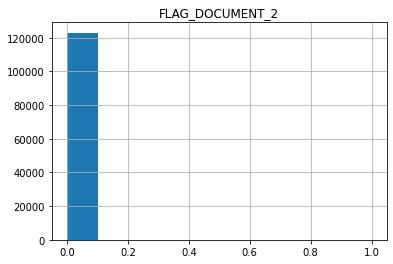

In [ ]:
df.hist(column='FLAG_DOCUMENT_2')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae50183ac0>]],
      dtype=object)

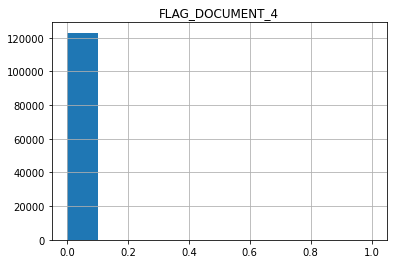

In [ ]:
df.hist(column='FLAG_DOCUMENT_4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4fb28700>]],
      dtype=object)

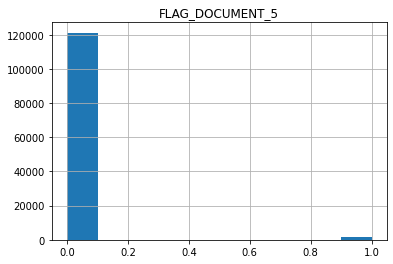

In [ ]:
df.hist(column='FLAG_DOCUMENT_5')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae50039610>]],
      dtype=object)

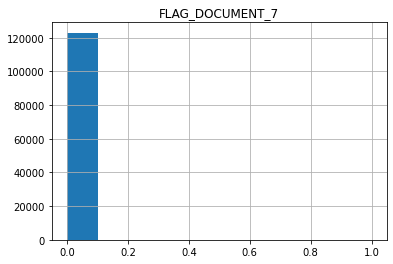

In [ ]:
df.hist(column='FLAG_DOCUMENT_7')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4fa167f0>]],
      dtype=object)

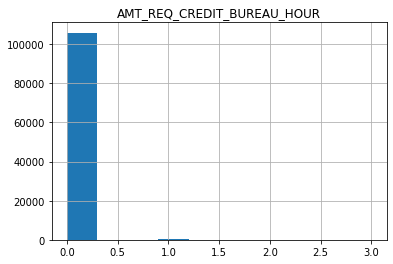

In [ ]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_HOUR')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4f989580>]],
      dtype=object)

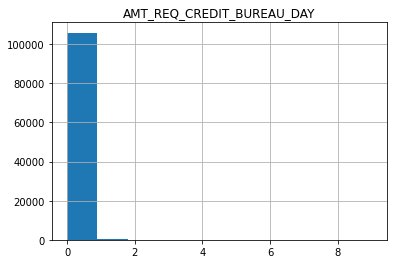

In [ ]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_DAY')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4f975250>]],
      dtype=object)

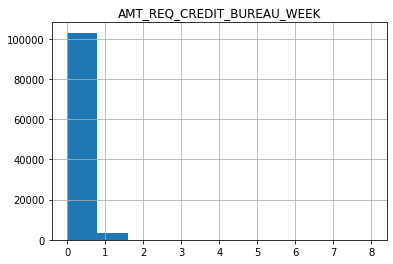

In [ ]:
df.hist(column='AMT_REQ_CREDIT_BUREAU_WEEK')

In [ ]:
df.shape

(123005, 99)

In [ ]:
df = df.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7',
             'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
             'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
              'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
             'AMT_REQ_CREDIT_BUREAU_DAY','HOUR_APPR_PROCESS_START'],axis=1)

In [ ]:
df.shape

(123005, 79)

### Analysed the Correlation Matrix, but it did not help to improve Score

In [ ]:
#df = df.drop(['AMT_GOODS_PRICE','FLAG_EMP_PHONE','REGION_RATING_CLIENT_W_CITY','APARTMENTS_MODE','BASEMENTAREA_MODE',
#              'ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE','LANDAREA_MODE','LIVINGAREA_MODE','NONLIVINGAREA_MODE',
#              'APARTMENTS_MEDI','BASEMENTAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMAX_MEDI','LANDAREA_MEDI',
#              'LIVINGAREA_MEDI','NONLIVINGAREA_MEDI','OBS_60_CNT_SOCIAL_CIRCLE'],axis=1)

### DAYS_EMPLOYED had 32,919 values with Value = 365243, which may be depicting NULL values as it is very large compared to others, so we replaces it with nan value.

In [ ]:
df['DAYS_EMPLOYED'].replace(365243, np.nan,inplace=True)

In [ ]:
df.columns[df.isin(['XNA']).any()]

Index(['CODE_GENDER', 'ORGANIZATION_TYPE'], dtype='object')

### ORGANIZATION_TYPE had 33236 values which are XNA which may be depicting Null values, so replaced it with nan value.

In [ ]:
df['ORGANIZATION_TYPE'].replace('XNA', np.nan,inplace=True)

In [ ]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    27049
Self-employed             15535
Other                      6722
Medicine                   4441
Business Entity Type 2     4221
Government                 4179
School                     3590
Trade: type 7              3139
Kindergarten               2730
Construction               2646
Business Entity Type 1     2455
Transport: type 4          2170
Trade: type 3              1399
Industry: type 9           1385
Industry: type 3           1267
Security                   1254
Housing                    1172
Industry: type 11          1091
Military                   1086
Agriculture                1015
Bank                       1014
Police                      935
Transport: type 2           857
Postal                      846
Security Ministries         769
Restaurant                  717
Trade: type 2               700
Services                    631
University                  534
Industry: type 7            530
Transport: type 3           465
Industry

### Gender Column also had 2 XNA Value, Replacing it with NULL Value

In [ ]:
df['CODE_GENDER'].value_counts()

F      81091
M      41912
XNA        2
Name: CODE_GENDER, dtype: int64

In [ ]:
df['CODE_GENDER'].replace('XNA', np.nan,inplace=True)

In [ ]:
df['CODE_GENDER'].value_counts()

F    81091
M    41912
Name: CODE_GENDER, dtype: int64

### Analysing Dataset Based on datatypes

In [ ]:
float_data=list(df.select_dtypes(['float64']).columns)
float_data

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
int_data=list(df.select_dtypes(['int64']).columns)
int_data

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_8']

In [ ]:
for i in float_data:
    print(i)
    print(df[i].isnull().sum())

AMT_INCOME_TOTAL
0
AMT_CREDIT
0
AMT_ANNUITY
6
AMT_GOODS_PRICE
111
REGION_POPULATION_RELATIVE
0
DAYS_EMPLOYED
22138
DAYS_REGISTRATION
0
OWN_CAR_AGE
81296
CNT_FAM_MEMBERS
1
EXT_SOURCE_1
69304
EXT_SOURCE_2
247
EXT_SOURCE_3
24309
APARTMENTS_AVG
62486
YEARS_BEGINEXPLUATATION_AVG
60107
ELEVATORS_AVG
65571
ENTRANCES_AVG
62021
FLOORSMAX_AVG
61294
LIVINGAREA_AVG
61816
NONLIVINGAREA_AVG
67894
APARTMENTS_MODE
62486
YEARS_BEGINEXPLUATATION_MODE
60107
ELEVATORS_MODE
65571
ENTRANCES_MODE
62021
FLOORSMAX_MODE
61294
LIVINGAREA_MODE
61816
NONLIVINGAREA_MODE
67894
APARTMENTS_MEDI
62486
YEARS_BEGINEXPLUATATION_MEDI
60107
ELEVATORS_MEDI
65571
ENTRANCES_MEDI
62021
FLOORSMAX_MEDI
61294
LIVINGAREA_MEDI
61816
NONLIVINGAREA_MEDI
67894
TOTALAREA_MODE
59483
OBS_30_CNT_SOCIAL_CIRCLE
382
DEF_30_CNT_SOCIAL_CIRCLE
382
OBS_60_CNT_SOCIAL_CIRCLE
382
DEF_60_CNT_SOCIAL_CIRCLE
382
DAYS_LAST_PHONE_CHANGE
0
AMT_REQ_CREDIT_BUREAU_WEEK
16521
AMT_REQ_CREDIT_BUREAU_MON
16521
AMT_REQ_CREDIT_BUREAU_QRT
16521
AMT_REQ_CREDIT_BUREAU

In [ ]:
for i in int_data:
    print(i)
    print(df[i].isnull().sum())

SK_ID_CURR
0
CNT_CHILDREN
0
DAYS_BIRTH
0
DAYS_ID_PUBLISH
0
FLAG_MOBIL
0
FLAG_EMP_PHONE
0
FLAG_WORK_PHONE
0
FLAG_CONT_MOBILE
0
FLAG_PHONE
0
FLAG_EMAIL
0
REGION_RATING_CLIENT
0
REGION_RATING_CLIENT_W_CITY
0
REG_REGION_NOT_LIVE_REGION
0
REG_REGION_NOT_WORK_REGION
0
LIVE_REGION_NOT_WORK_REGION
0
REG_CITY_NOT_LIVE_CITY
0
REG_CITY_NOT_WORK_CITY
0
LIVE_CITY_NOT_WORK_CITY
0
FLAG_DOCUMENT_3
0
FLAG_DOCUMENT_6
0
FLAG_DOCUMENT_8
0


### We can see that Columns of Integer Datatype have no NULL Values

In [ ]:
numeric = float_data + int_data

In [ ]:
numeric

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'SK_ID_CURR',
 'CNT_CHILDREN',
 '

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

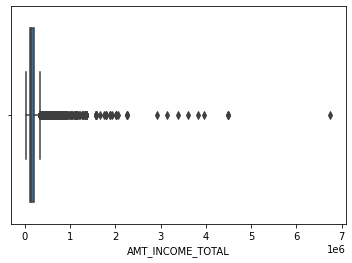

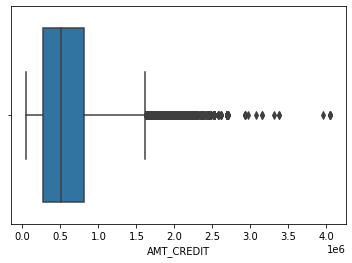

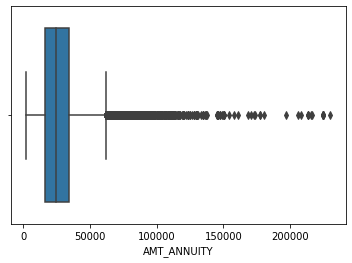

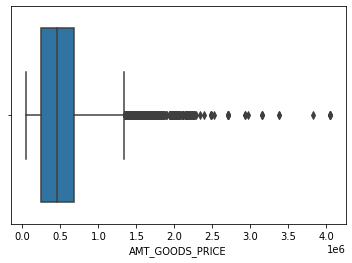

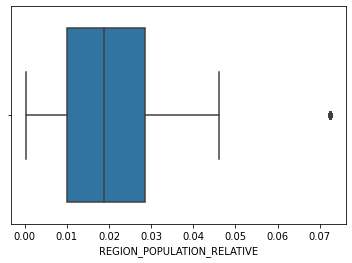

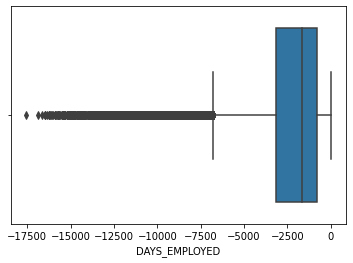

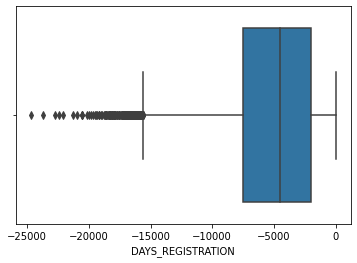

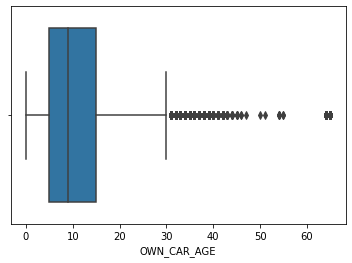

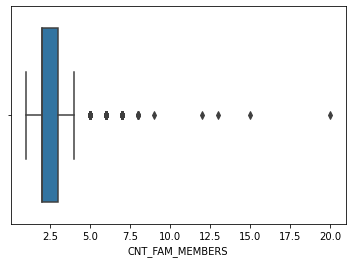

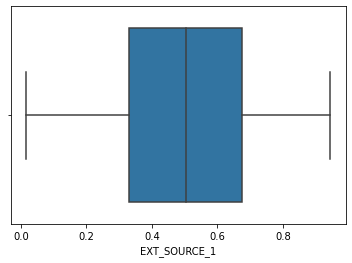

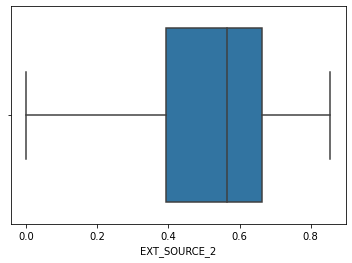

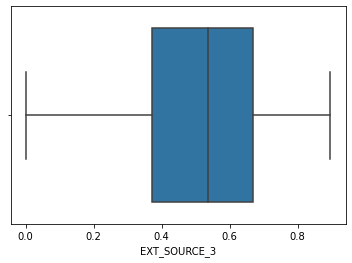

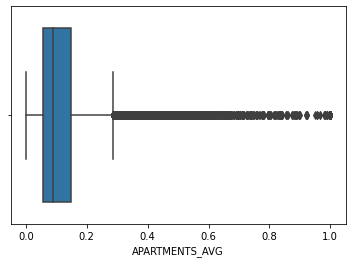

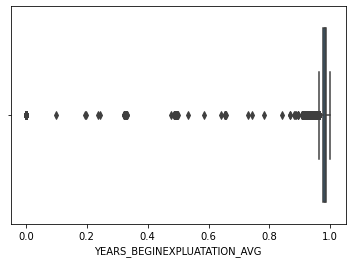

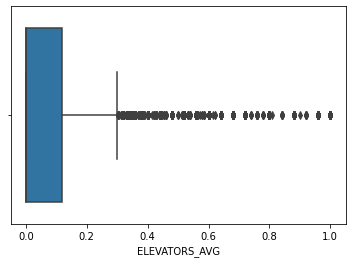

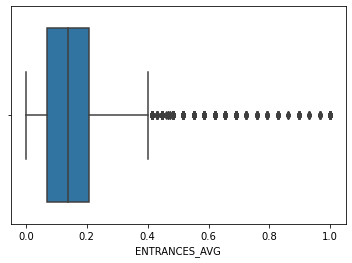

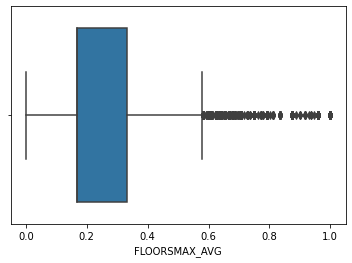

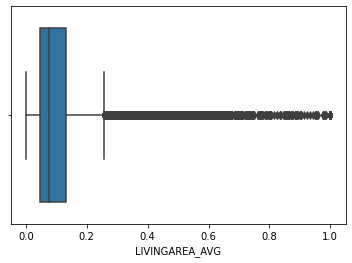

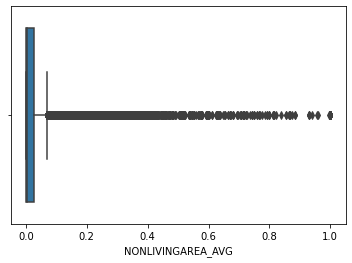

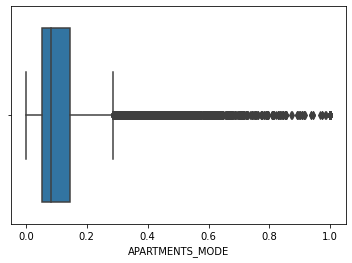

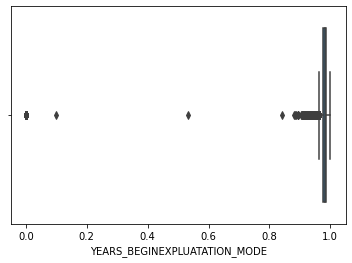

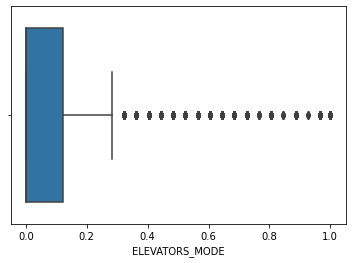

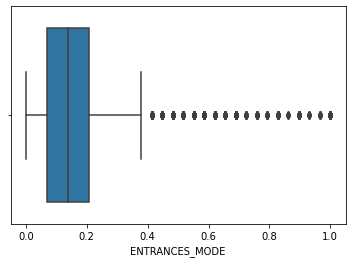

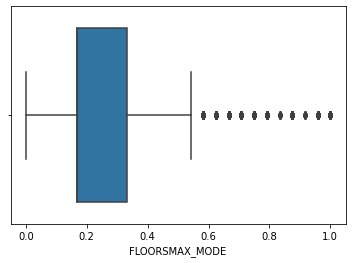

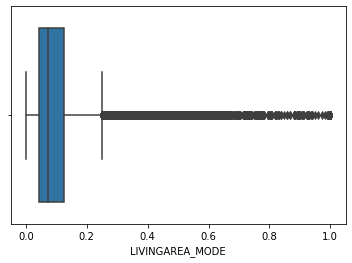

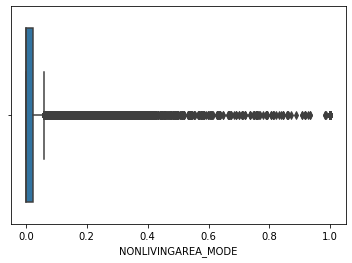

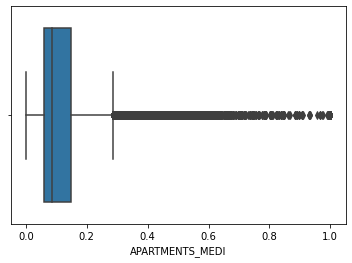

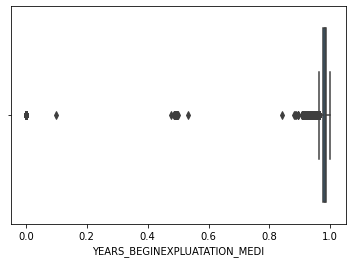

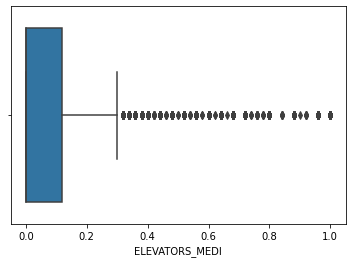

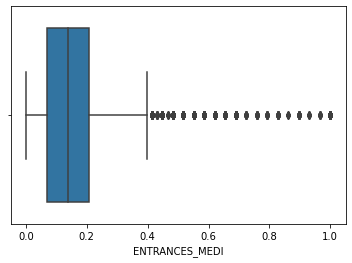

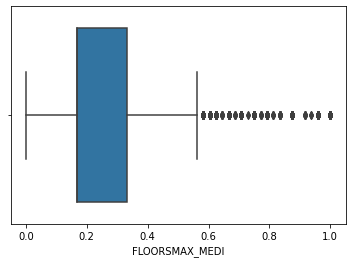

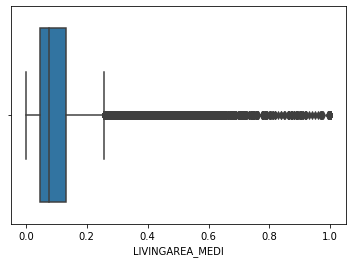

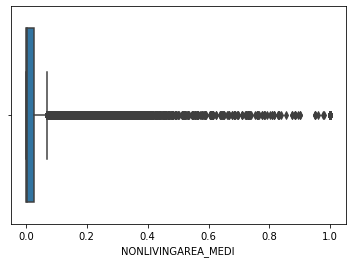

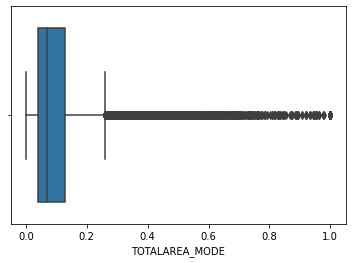

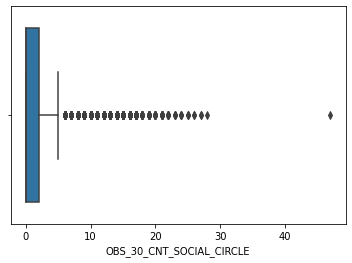

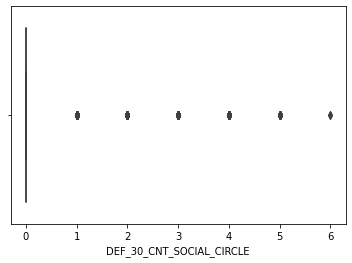

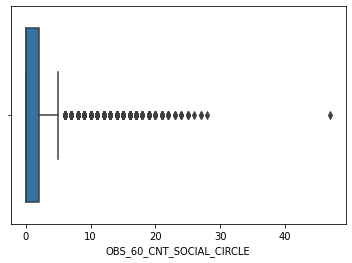

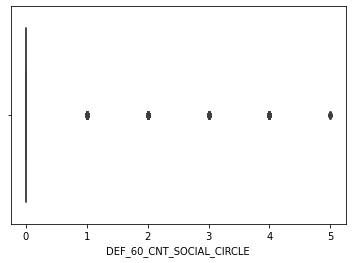

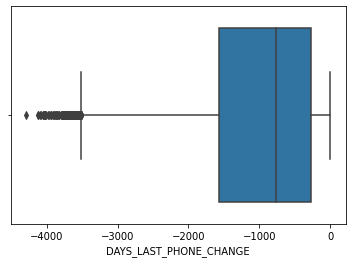

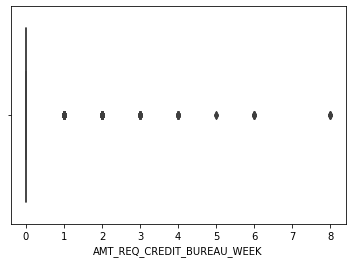

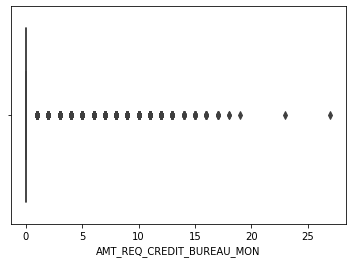

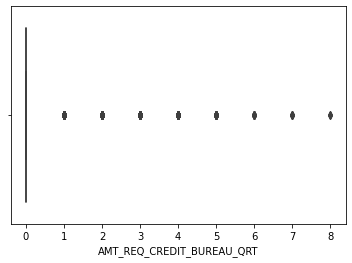

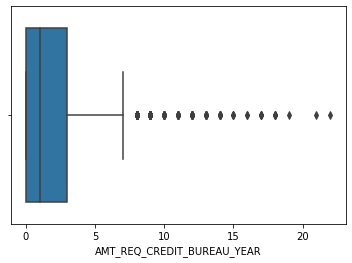

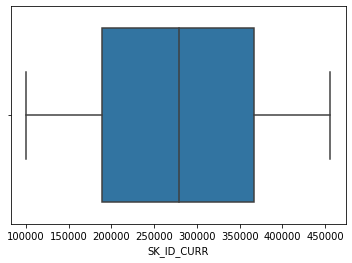

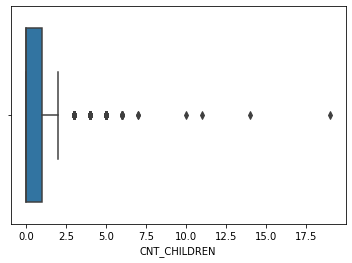

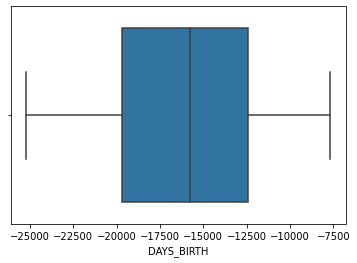

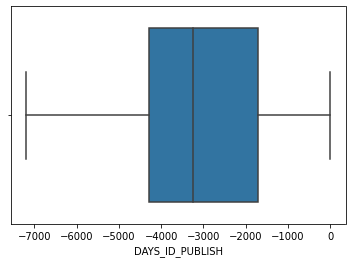

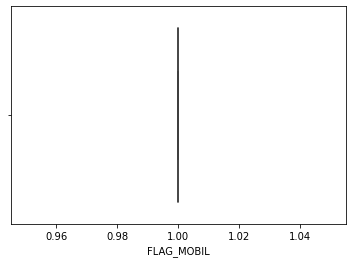

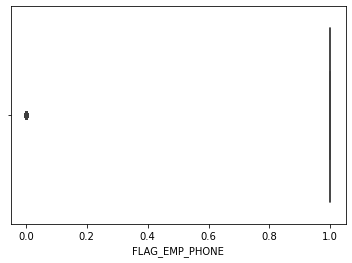

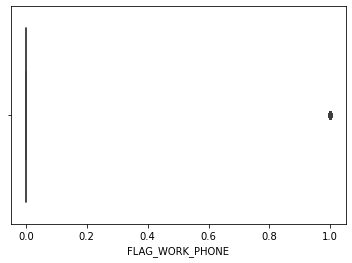

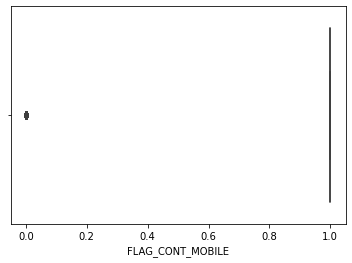

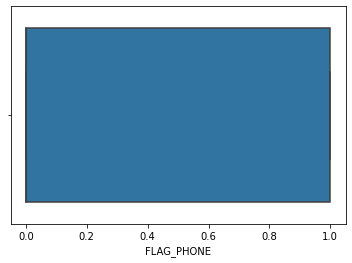

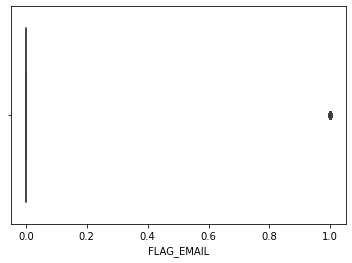

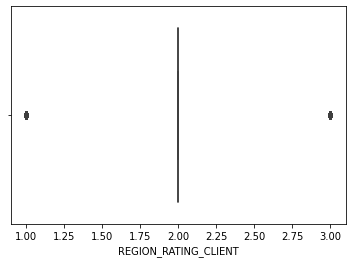

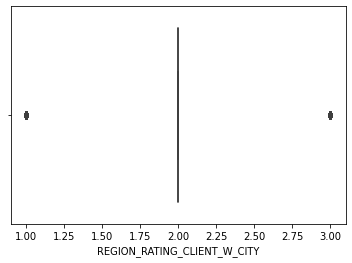

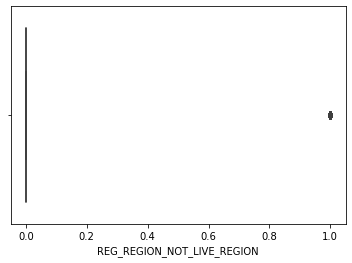

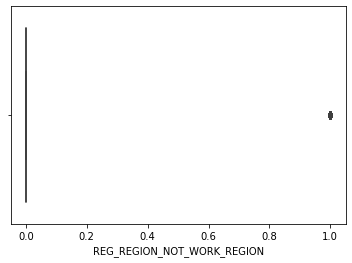

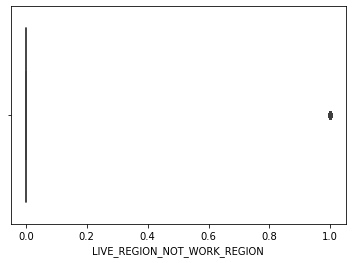

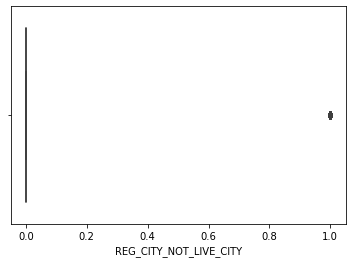

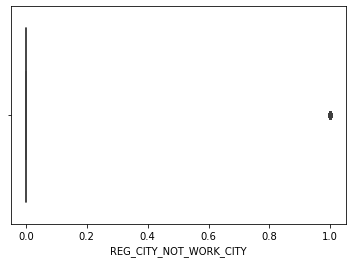

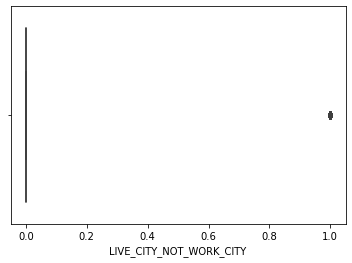

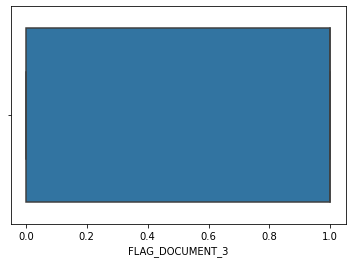

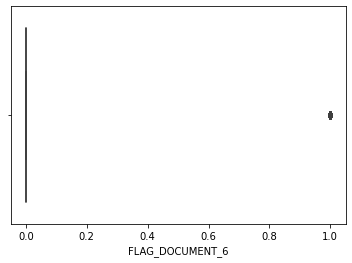

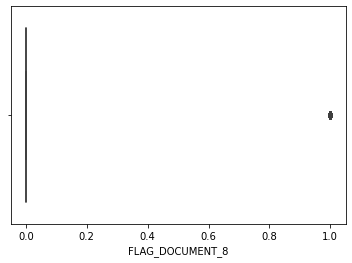

In [ ]:
for i in numeric:
    plt.figure()
    sns.boxplot(df[i])

### Outlier Detection

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4f6b6070>]],
      dtype=object)

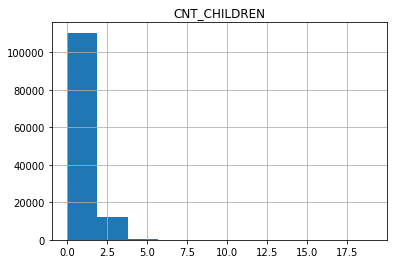

In [ ]:
df.hist(column='CNT_CHILDREN')

In [ ]:
df.shape

(123005, 79)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae4ec610d0>]],
      dtype=object)

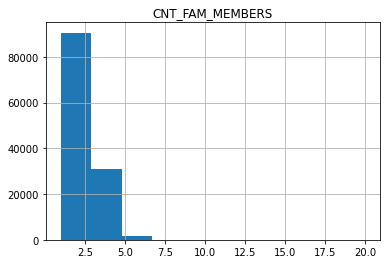

In [ ]:
df.hist(column='CNT_FAM_MEMBERS')

In [ ]:
df['AMT_INCOME_TOTAL'].skew()

8.54866706397846

In [ ]:
df['AMT_INCOME_TOTAL'].max()

6750000.0

In [ ]:
df.nlargest(10,'AMT_INCOME_TOTAL')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
50262,252084,Cash loans,M,Y,N,0,6750000.0,790830.0,52978.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.009549,-19341,-443.0,-7414.0,-2886,8.0,1,1,1,1,1,0,Laborers,2.0,2,2,TUESDAY,0,1,1,0,1,1,Transport: type 4,NaN,0.552838,0.495666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-695.0,0,0,1,1.0,0.0,0.0,4.0
46398,432980,Cash loans,M,Y,Y,0,4500000.0,1755000.0,61132.5,1755000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010032,-18784,-3618.0,-9447.0,-2315,11.0,1,1,1,1,0,0,Managers,2.0,2,2,SATURDAY,0,0,0,0,0,0,Self-employed,0.429508,0.407386,0.345785,0.1093,0.9871,0.12,0.1034,0.3333,0.0703,0.0459,0.1113,0.9871,0.1208,0.1034,0.3333,0.0732,0.0485,0.1103,0.9871,0.12,0.1034,0.3333,0.0715,0.0468,block of flats,0.0903,Panel,No,3.0,0.0,3.0,0.0,-284.0,1,0,0,1.0,0.0,0.0,0.0
84417,337151,Cash loans,M,N,N,0,4500000.0,450000.0,47749.5,450000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.009334,-18461,-8472.0,-1179.0,-1997,NaN,1,1,0,1,1,0,Managers,1.0,2,2,TUESDAY,0,0,0,0,0,0,Military,0.474598,0.798003,NaN,0.1608,0.9806,0.00,0.3448,0.1667,0.1360,0.0000,0.1639,0.9806,0.0000,0.3448,0.1667,0.1417,0.0000,0.1624,0.9806,0.00,0.3448,0.1667,0.1385,0.0000,block of flats,0.1234,Panel,No,0.0,0.0,0.0,0.0,-3206.0,1,0,0,NaN,NaN,NaN,NaN
111814,317748,Cash loans,M,N,N,0,4500000.0,835380.0,42651.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006008,-18715,-3331.0,-8877.0,-2104,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,FRIDAY,1,1,0,1,1,0,Construction,NaN,0.748822,0.282248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-613.0,1,0,0,0.0,0.0,0.0,2.0
81090,310601,Cash loans,M,Y,Y,1,3950059.5,675000.0,66217.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.032561,-10572,-3163.0,-10078.0,-683,1.0,1,1,1,1,1,0,Managers,3.0,1,1,MONDAY,0,0,0,0,0,0,Trade: type 2,NaN,0.597760,0.730987,0.0464,0.9747,0.04,0.0345,0.3333,0.0394,0.0089,0.0473,0.9747,0.0403,0.0345,0.3333,0.0411,0.0094,0.0468,0.9747,0.04,0.0345,0.3333,0.0401,0.0090,block of flats,0.0329,"Stone, brick",No,4.0,0.0,4.0,0.0,-902.0,0,0,0,0.0,0.0,0.0,1.0
82241,123587,Cash loans,M,Y,N,0,3825000.0,1241023.5,117369.0,1206000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.046220,-18456,-1095.0,-80.0,-2003,6.0,1,1,0,1,0,1,Managers,2.0,1,1,THURSDAY,0,1,1,1,0,0,Business Entity T

In [ ]:
df.shape

(123005, 79)

In [ ]:
df.shape

(123005, 79)

In [ ]:
df['AMT_INCOME_TOTAL'].describe()

count    1.230050e+05
mean     1.684971e+05
std      1.034338e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      6.750000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
df['AMT_INCOME_TOTAL'] = np.where(df['AMT_INCOME_TOTAL'] > 220000.0, 148500.0, df['AMT_INCOME_TOTAL'])

In [ ]:
df['AMT_CREDIT'].describe()

count    1.230050e+05
mean     5.986369e+05
std      4.029306e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.123385e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [ ]:
df['AMT_CREDIT'] = np.where(df['AMT_CREDIT'] > 3000000.0, 515529.0, df['AMT_CREDIT'])

In [ ]:
df.nlargest(20,'AMT_CREDIT')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
118693,110403,Cash loans,M,Y,Y,0,148500.0,2961000.0,105511.5,2961000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-22484,-1445.0,-4886.0,-5038,7.0,1,1,0,1,0,0,Laborers,2.0,3,3,TUESDAY,0,0,0,0,0,0,Industry: type 9,NaN,0.546223,NaN,0.2227,0.9856,0.24,0.2069,0.3333,0.2442,0.0000,0.2269,0.9856,0.2417,0.2069,0.3333,0.2544,0.0000,0.2248,0.9856,0.24,0.2069,0.3333,0.2486,0.0000,block of flats,0.2700,Panel,No,8.0,0.0,8.0,0.0,-1624.0,0,0,0,NaN,NaN,NaN,NaN
63424,170096,Cash loans,F,Y,N,0,148500.0,2931660.0,74110.5,2700000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.032561,-20736,-6602.0,-8885.0,-753,18.0,1,1,1,1,1,0,Managers,1.0,1,1,TUESDAY,0,0,0,0,0,0,Kindergarten,0.794718,0.689822,0.681706,0.2526,0.9876,0.32,0.1379,0.4583,0.2912,0.0125,0.2574,0.9876,0.3222,0.1379,0.4583,0.3033,0.0133,0.2550,0.9876,0.32,0.1379,0.4583,0.2964,0.0128,block of flats,0.2317,Panel,No,0.0,0.0,0.0,0.0,-625.0,0,0,0,0.0,0.0,0.0,0.0
76599,430143,Cash loans,M,Y,Y,0,148500.0,2931660.0,74110.5,2700000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-14868,-2100.0,-4545.0,-4518,5.0,1,1,1,1,1,0,Managers,2.0,2,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,NaN,0.644362,0.119119,0.0701,0.9791,0.00,0.1379,0.1667,0.0499,0.0296,0.0714,0.9791,0.0000,0.1379,0.1667,0.0520,0.0313,0.0708,0.9791,0.00,0.1379,0.1667,0.0508,0.0302,block of flats,0.0457,"Stone, brick",No,0.0,0.0,0.0,0.0,-292.0,0,0,0,0.0,3.0,0.0,1.0
90783,239391,Cash loans,M,N,N,1,148500.0,2931660.0,74241.0,2700000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,With parents,0.009657,-11276,-774.0,-782.0,-2652,NaN,1,1,1,1,0,0,Managers,3.0,2,2,TUESDAY,1,1,0,1,1,0,Trade: type 3,NaN,0.603666,0.204423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1.0,0,0,0,0.0,0.0,0.0,0.0
89194,108906,Cash loans,M,Y,N,1,148500.0,2925000.0,73944.0,2925000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.007120,-15752,-933.0,-1388.0,-3977,4.0,1,1,1,1,1,0,Managers,3.0,2,2,FRIDAY,1,1,0,1,1,0,Trade: type 7,0.503985,0.591677,0.355639,0.1546,0.9911,0.16,0.1034,0.4583,0.1010,0.1893,0.1576,0.9911,0.1611,0.1034,0.4583,0.1053,0.2004,0.1561,0.9911,0.16,0.1034,0.4583,0.1029,0.1932,block of flats,0.1335,"Stone, brick",No,1.0,0.0,1.0,0.0,-1.0,0,0,0,0.0,0.0,0.0,0.0
16730,453530,Cash loans,F,N,Y,0,184950.0,2700000.0,68256.0,2700000.0,Unaccompanied,Commercial associate,Higher e

In [ ]:
df['AMT_ANNUITY'].describe()

count    122999.000000
mean      27099.750994
std       14531.338692
min        1980.000000
25%       16501.500000
50%       24853.500000
75%       34596.000000
max      230161.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df.nlargest(20,'AMT_ANNUITY')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
66113,217854,Cash loans,F,N,N,0,148500.0,2303460.0,230161.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.002506,-20273,-2334.0,-2352.0,-3816,NaN,1,1,0,1,0,0,NaN,2.0,2,2,FRIDAY,0,0,0,0,0,0,Other,NaN,0.638760,0.746300,0.0918,0.9776,0.0000,0.2069,0.1667,0.0866,0.0078,0.0924,0.9777,0.0000,0.2069,0.1667,0.0895,0.0083,0.0926,0.9776,0.00,0.2069,0.1667,0.0882,0.0080,block of flats,0.0687,Panel,No,0.0,0.0,0.0,0.0,-4.0,1,0,0,0.0,0.0,0.0,0.0
25795,408308,Revolving loans,M,Y,N,0,148500.0,2250000.0,225000.0,2250000.0,Family,State servant,Higher education,Married,House / apartment,0.028663,-22766,-1039.0,-9191.0,-4724,0.0,1,1,0,1,1,0,Accountants,2.0,2,2,WEDNESDAY,0,0,0,0,0,0,Other,0.870042,0.744162,NaN,0.0371,0.9707,0.0000,0.1034,0.1250,0.0420,0.0000,0.0378,0.9707,0.0000,0.1034,0.1250,0.0437,0.0000,0.0375,0.9707,0.00,0.1034,0.1250,0.0427,0.0000,block of flats,0.0582,"Stone, brick",No,0.0,0.0,0.0,0.0,-611.0,0,0,0,NaN,NaN,NaN,NaN
36463,118093,Revolving loans,F,Y,Y,0,148500.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,Rented apartment,0.010006,-19672,-12615.0,-10406.0,-3131,7.0,1,1,0,1,0,0,High skill tech staff,2.0,2,1,SATURDAY,0,0,0,0,0,0,Industry: type 9,0.635751,0.794677,0.667458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-308.0,0,0,0,0.0,0.0,0.0,0.0
37310,217276,Revolving loans,M,Y,Y,0,148500.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-13386,-5564.0,-4028.0,-1031,1.0,1,1,1,1,1,0,NaN,2.0,1,1,FRIDAY,1,1,0,1,1,0,Trade: type 2,NaN,0.551281,0.574447,0.0701,0.9215,0.0000,0.3103,0.1250,0.1062,0.0334,0.0714,0.9215,0.0000,0.3103,0.1250,0.1107,0.0353,0.0708,0.9215,0.00,0.3103,0.1250,0.1081,0.0341,block of flats,0.0908,"Stone, brick",No,0.0,0.0,0.0,0.0,-2.0,0,0,0,0.0,0.0,0.0,0.0
78297,177152,Revolving loans,M,Y,Y,1,148500.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-12291,-1727.0,-868.0,-4729,2.0,1,1,0,1,0,1,Managers,3.0,1,1,FRIDAY,0,0,0,0,0,0,Other,NaN,0.745201,0.581484,0.0843,0.9682,0.0700,0.1552,0.2083,0.1017,0.0936,0.0630,0.9682,0.0000,0.1379,0.1667,0.0452,0.0308,0.0625,0.9682,0.00,0.1379,0.1667,0.0634,0.0577,block of flats,0.2385,"Stone, brick",No,0.0,0.0,0.0,0.0,-1183.0,0,0,0,0.0,0.0,0.0,0.0
104839,123467,Revolving loans,F,Y,Y,0,148500.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married

In [ ]:
df['AMT_ANNUITY'] = np.where(df['AMT_ANNUITY'] > 200000.0, 24939.0, df['AMT_ANNUITY'])

In [ ]:
df['AMT_ANNUITY'].describe()

count    122999.000000
mean      27076.031923
std       14375.054991
min        1980.000000
25%       16501.500000
50%       24853.500000
75%       34596.000000
max      197230.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df['AMT_GOODS_PRICE'].describe()

count    1.228940e+05
mean     5.379516e+05
std      3.697775e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
df['AMT_GOODS_PRICE'] = np.where(df['AMT_GOODS_PRICE'] > 3000000.0, 450000.0, df['AMT_GOODS_PRICE'])

In [ ]:
df['OWN_CAR_AGE'].describe()

count    41709.000000
mean        12.079144
std         11.966352
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         65.000000
Name: OWN_CAR_AGE, dtype: float64

In [ ]:
df['OWN_CAR_AGE'] = np.where(df['OWN_CAR_AGE'] > 80.0, 9.0, df['OWN_CAR_AGE'])

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].max()

47.0

In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].describe()

count    122623.000000
mean          1.416463
std           2.315372
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df.nlargest(5,'OBS_30_CNT_SOCIAL_CIRCLE')

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,YEARS_BEGINEXPLUATATION_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,LIVINGAREA_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,YEARS_BEGINEXPLUATATION_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,LIVINGAREA_MEDI,NONLIVINGAREA_MEDI,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
55993,189856,Cash loans,M,Y,Y,1,157500.0,296280.0,23539.5,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.010147,-14767,-2767.0,-13306.0,-4720,11.0,1,1,0,1,0,1,Laborers,3.0,2,2,MONDAY,0,0,0,0,0,0,Industry: type 4,0.459887,0.398805,0.750375,0.2216,0.9816,0.24,0.2069,0.3333,0.2615,NaN,0.2258,0.9816,0.2417,0.2069,0.3333,0.2724,NaN,0.2238,0.9816,0.24,0.2069,0.3333,0.2662,NaN,block of flats,0.2057,Panel,No,47.0,0.0,47.0,0.0,0.0,1,0,0,0.0,0.0,0.0,4.0
56397,138785,Cash loans,F,N,N,0,45000.0,143910.0,14364.0,135000.0,Family,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-20410,NaN,-3132.0,-3699,NaN,1,0,0,1,0,0,NaN,2.0,2,2,FRIDAY,0,0,0,0,0,0,NaN,0.890902,0.202409,0.649620,0.0722,0.9851,0.00,0.1379,0.1667,0.0522,0.0000,0.0735,0.9851,0.0000,0.1379,0.1667,0.0544,0.0000,0.0729,0.9851,0.00,0.1379,0.1667,0.0531,0.000,block of flats,0.0410,Panel,No,28.0,0.0,28.0,0.0,-1533.0,0,1,0,0.0,0.0,0.0,3.0
44448,252168,Cash loans,M,Y,Y,1,189000.0,276277.5,17784.0,238500.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.025164,-15191,-2248.0,-1700.0,-4760,3.0,1,1,0,1,0,0,Laborers,3.0,2,2,MONDAY,0,0,0,0,0,0,Business Entity Type 3,0.168279,0.298638,0.172495,0.0660,0.9752,0.00,0.1379,0.1667,0.0374,0.0519,0.0672,0.9752,0.0000,0.1379,0.1667,0.0390,0.0549,0.0666,0.9752,0.00,0.1379,0.1667,0.0381,0.053,block of flats,0.0407,"Stone, brick",No,27.0,0.0,27.0,0.0,-1841.0,1,0,0,0.0,0.0,0.0,3.0
79218,178967,Cash loans,M,Y,N,0,148500.0,277969.5,10606.5,229500.0,"Spouse, partner",Working,Secondary / secondary special,Married,House / apartment,0.032561,-20126,-2838.0,-4041.0,-3244,16.0,1,1,0,1,1,0,Laborers,2.0,1,1,THURSDAY,0,0,0,0,1,1,Housing,0.543629,0.736881,0.631355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,0.0,27.0,0.0,-1616.0,1,0,0,1.0,2.0,0.0,2.0
36148,331614,Cash loans,F,N,Y,0,144000.0,663093.0,21519.0,553500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.022625,-15225,-4622.0,-446.0,-1160,NaN,1,1,1,1,0,0,Sales staff,2.0,2,2,SUNDAY,0,0,0,0,1,1,Business Entity Type 3,NaN,0.520584,0.782608,0.0165,0.9737,NaN,0.0690,0.0417,0.0085,NaN,0.0168,0.9737,NaN,0.0690,0.0417,0.0088,NaN,0.0167,0.9737,NaN,0.0690,0.0417,0.0086,NaN,block of flats,0.0132,"Stone, brick",No,26.0,2.0,25.0,2.0,-1316.0,1,0,0,0.0,0.0,0.0,3.0


In [ ]:
df['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(df['OBS_30_CNT_SOCIAL_CIRCLE'] > 347.0, 2.0, df['OBS_30_CNT_SOCIAL_CIRCLE'])

In [ ]:
df['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    122623.000000
mean          0.142086
std           0.438215
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df['DEF_30_CNT_SOCIAL_CIRCLE'] = np.where(df['DEF_30_CNT_SOCIAL_CIRCLE'] > 33.0, 0.0, df['DEF_30_CNT_SOCIAL_CIRCLE'])

In [ ]:
df['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    122623.000000
mean          1.399362
std           2.294720
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          47.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df['OBS_60_CNT_SOCIAL_CIRCLE'] = np.where(df['OBS_60_CNT_SOCIAL_CIRCLE'] > 343.0, 2.0, df['OBS_60_CNT_SOCIAL_CIRCLE'])

In [ ]:
df['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    122623.000000
mean          0.099215
std           0.356782
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

In [ ]:
df['DEF_60_CNT_SOCIAL_CIRCLE'] = np.where(df['DEF_60_CNT_SOCIAL_CIRCLE'] > 23.0, 0.0, df['DEF_60_CNT_SOCIAL_CIRCLE'])

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    106484.000000
mean          0.263533
std           0.613427
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [ ]:
df['AMT_REQ_CREDIT_BUREAU_QRT'] = np.where(df['AMT_REQ_CREDIT_BUREAU_QRT'] > 260.0, 0.0, df['AMT_REQ_CREDIT_BUREAU_QRT'])

In [ ]:
df['AMT_INCOME_TOTAL'].skew()

-0.26226447151904936

In [ ]:
numeric_plot = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION',
                'OWN_CAR_AGE','CNT_FAM_MEMBERS','CNT_CHILDREN','DAYS_LAST_PHONE_CHANGE','DAYS_EMPLOYED','APARTMENTS_AVG',
                'ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','LIVINGAREA_AVG','OBS_30_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_QRT',
                'NONLIVINGAREA_AVG','TOTALAREA_MODE','EXT_SOURCE_3','DAYS_BIRTH','DAYS_ID_PUBLISH','YEARS_BEGINEXPLUATATION_AVG']

In [ ]:
#for i in numeric_plot:    
#    q1,q3 = np.percentile(df[i],[25,75])
#    iqr = q3 - q1
#    lb = q1 - 1.5*iqr
#    up = q3 + 1.5*iqr
#    df[i] = np.where(df[i] > up, up, df[i])
#    df[i] = np.where(df[i] < lb, lb, df[i])

In [ ]:
#for i in numeric:
#    plt.figure()
#    sns.boxplot(df[i])

In [ ]:
list_median = []

for i in float_data:
    list_median.append(df[i].median())

print(list_median)

[144000.0, 512338.5, 24853.5, 450000.0, 0.01885, -1650.0, -4501.0, 9.0, 2.0, 0.5052422478938959, 0.5658298134939148, 0.5352762504724826, 0.0876, 0.9821, 0.0, 0.1379, 0.1667, 0.0748, 0.0037, 0.084, 0.9816, 0.0, 0.1379, 0.1667, 0.0733, 0.0012, 0.0864, 0.9816, 0.0, 0.1379, 0.1667, 0.0753, 0.0032, 0.0689, 0.0, 0.0, 0.0, 0.0, -759.0, 0.0, 0.0, 0.0, 1.0]


In [ ]:
for col in range(len(float_data)):
    print(df[float_data[col]].isna().sum())
    df[float_data[col]].fillna(float(list_median[col]), inplace=True)
    print(df[float_data[col]].isna().sum())

0
0
0
0
6
0
111
0
0
0
22138
0
0
0
81296
0
1
0
69304
0
247
0
24309
0
62486
0
60107
0
65571
0
62021
0
61294
0
61816
0
67894
0
62486
0
60107
0
65571
0
62021
0
61294
0
61816
0
67894
0
62486
0
60107
0
65571
0
62021
0
61294
0
61816
0
67894
0
59483
0
382
0
382
0
382
0
382
0
0
0
16521
0
16521
0
16521
0
16521
0


In [ ]:
x1=list(df.select_dtypes(['object']).columns)
x1

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
for i in x1:
    print(i)
    print(df[i].isnull().sum())

NAME_CONTRACT_TYPE
0
CODE_GENDER
2
FLAG_OWN_CAR
0
FLAG_OWN_REALTY
0
NAME_TYPE_SUITE
522
NAME_INCOME_TYPE
0
NAME_EDUCATION_TYPE
0
NAME_FAMILY_STATUS
0
NAME_HOUSING_TYPE
0
OCCUPATION_TYPE
38524
WEEKDAY_APPR_PROCESS_START
0
ORGANIZATION_TYPE
22138
HOUSETYPE_MODE
61815
WALLSMATERIAL_MODE
62620
EMERGENCYSTATE_MODE
58419


#### Replacing Nan Values with Random value of the same dataset to avoid skewing

In [ ]:
df['NAME_TYPE_SUITE']=df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])

In [ ]:
df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      99989
Family             16105
Spouse, partner     4501
Children            1285
Other_B              689
Other_A              338
Group of people       98
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE']=df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0])

In [ ]:
df['OCCUPATION_TYPE'].value_counts()

Laborers                 60742
Sales staff              12751
Core staff               11078
Managers                  8591
Drivers                   7365
High skill tech staff     4521
Accountants               3916
Medicine staff            3407
Security staff            2647
Cooking staff             2325
Cleaning staff            1887
Private service staff     1087
Low-skill Laborers         870
Waiters/barmen staff       529
Secretaries                518
Realty agents              317
HR staff                   242
IT staff                   212
Name: OCCUPATION_TYPE, dtype: int64

In [ ]:
df['OCCUPATION_TYPE'].isnull().sum()

0

In [ ]:
df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].fillna(df['ORGANIZATION_TYPE'].mode()[0])

In [ ]:
df['ORGANIZATION_TYPE'].isnull().sum()

0

In [ ]:
df['HOUSETYPE_MODE'] = df['HOUSETYPE_MODE'].fillna(df['HOUSETYPE_MODE'].mode()[0])

In [ ]:
df['HOUSETYPE_MODE'].isnull().sum()

0

In [ ]:
df['WALLSMATERIAL_MODE'] = df['WALLSMATERIAL_MODE'].fillna(df['WALLSMATERIAL_MODE'].mode()[0])

In [ ]:
df['WALLSMATERIAL_MODE'].isnull().sum()

0

In [ ]:
df['EMERGENCYSTATE_MODE'] = df['EMERGENCYSTATE_MODE'].fillna(df['EMERGENCYSTATE_MODE'].mode()[0])

In [ ]:
df['EMERGENCYSTATE_MODE'].isnull().sum()

0

In [ ]:
print(df['EMERGENCYSTATE_MODE'].value_counts())

No     122120
Yes       885
Name: EMERGENCYSTATE_MODE, dtype: int64


In [ ]:
#x1=list(df.select_dtypes(['object']).columns)
#x1

In [ ]:
df.skew(axis=0, skipna=True,numeric_only=True)

SK_ID_CURR                      -0.004876
CNT_CHILDREN                     1.976263
AMT_INCOME_TOTAL                -0.262264
AMT_CREDIT                       1.219236
AMT_ANNUITY                      1.350320
AMT_GOODS_PRICE                  1.327551
REGION_POPULATION_RELATIVE       1.495763
DAYS_BIRTH                      -0.112932
DAYS_EMPLOYED                   -2.286198
DAYS_REGISTRATION               -0.593209
DAYS_ID_PUBLISH                  0.345284
OWN_CAR_AGE                      5.229156
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                  -1.665437
FLAG_WORK_PHONE                  1.501989
FLAG_CONT_MOBILE               -23.968813
FLAG_PHONE                       0.978596
FLAG_EMAIL                       3.827907
CNT_FAM_MEMBERS                  0.986916
REGION_RATING_CLIENT             0.087132
REGION_RATING_CLIENT_W_CITY      0.059196
REG_REGION_NOT_LIVE_REGION       7.953328
REG_REGION_NOT_WORK_REGION       4.130810
LIVE_REGION_NOT_WORK_REGION      4

The distribution of skewness values is as below:

Skewness = 0 when the distribution is normal.
Skewness > 0 or positive when more weight is on the left side of the distribution.
Skewness < 0 or negative when more weight is on the right side of the distribution.

In [ ]:
for i in x1:
    print(i)
    print(df[i].isnull().sum())
 

NAME_CONTRACT_TYPE
0
CODE_GENDER
2
FLAG_OWN_CAR
0
FLAG_OWN_REALTY
0
NAME_TYPE_SUITE
0
NAME_INCOME_TYPE
0
NAME_EDUCATION_TYPE
0
NAME_FAMILY_STATUS
0
NAME_HOUSING_TYPE
0
OCCUPATION_TYPE
0
WEEKDAY_APPR_PROCESS_START
0
ORGANIZATION_TYPE
0
HOUSETYPE_MODE
0
WALLSMATERIAL_MODE
0
EMERGENCYSTATE_MODE
0


In [ ]:
for i in x1:
    print(i)
    print(df[i].value_counts())

NAME_CONTRACT_TYPE
Cash loans         111219
Revolving loans     11786
Name: NAME_CONTRACT_TYPE, dtype: int64
CODE_GENDER
F    81091
M    41912
Name: CODE_GENDER, dtype: int64
FLAG_OWN_CAR
N    81294
Y    41711
Name: FLAG_OWN_CAR, dtype: int64
FLAG_OWN_REALTY
Y    85253
N    37752
Name: FLAG_OWN_REALTY, dtype: int64
NAME_TYPE_SUITE
Unaccompanied      99989
Family             16105
Spouse, partner     4501
Children            1285
Other_B              689
Other_A              338
Group of people       98
Name: NAME_TYPE_SUITE, dtype: int64
NAME_INCOME_TYPE
Working                 63472
Commercial associate    28650
Pensioner               22135
State servant            8722
Student                    12
Unemployed                  7
Businessman                 4
Maternity leave             3
Name: NAME_INCOME_TYPE, dtype: int64
NAME_EDUCATION_TYPE
Secondary / secondary special    87299
Higher education                 30053
Incomplete higher                 4098
Lower secondary         

In [ ]:
df.isnull().sum()

SK_ID_CURR                      0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     2
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
OWN_CAR_AGE                     0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [ ]:
df.shape

(123005, 79)

### Using Label Encoding

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
  
for i in x1:
    df[i]= label_encoder.fit_transform(df[i])

In [ ]:
df.to_csv("/content/drive/MyDrive/MLProject/testlgbmpreproc.csv",index = False)